## Libraries Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from random import randint
from matplotlib import rcParams

## Load Data Function

In [4]:
def load_data(start_year, end_year, parameter):
    year = start_year - 1
    size = (end_year - start_year + 1) * 12
    month = 1
    x = [[]for i in range (size)]
    for i in range(0, size):
        year = year + 1 if ((i + 1) % 12) == 1 else year
        ms = '0' + str(month) if month<10 else str(month)
        filename = 'v' + parameter + str(year) + ms + '01' + '.txt'
        path = path = '~/Documents/Tesis/Data/' + parameter + '/' + str(year) + '/'
        x[i] = pd.read_csv(path + filename, header=None)
        month = month + 1 if month < 12 else 1
    return x

## Get Latitude and Longitude Functions

In [34]:
def findItem(theList, item):
    pos_list = [[ind, theList[ind].index(item)] for ind in range(len(theList)) if item in theList[ind]]
    return [pos_list[0][0], pos_list[0][1]]

def find_step(start, end, abs_step):
    act_step = abs(abs_step) if start < end else -abs(abs_step)
    return act_step

def create_list(start_lat, end_lat, start_lon, end_lon, lat_step, lon_step):
    lat = np.arange(start_lat, end_lat + lat_step, lat_step).tolist()
    lon = np.arange(start_lon, end_lon + lon_step, lon_step).tolist()
    grid = [[[]for i in range(len(lon))] for j in range(len(lat))]
    y = 0
    for i in range(0, len(lat)):
        for j in range(0, len(lon)):
            grid[i][j] = y
            y += 1
    return grid, lat, lon

def get_ll(index, grid, lat, lon):
    return lat[findItem(grid, index)[0]], lon[findItem(grid, index)[1]]

def get_index(latitude, longitude, lat, lon):
    return grid[lat.index(latitude)][lon.index(longitude)]

# print(get_ll(619683))
# print(get_index(-30.75,14))

## ARIMA Function

In [46]:
def arima_model(data, numpr):
    X = data
    actual_size = len(data)
    train_size = int(0.75*len(data))
    train = X[0:train_size]
    test = X[train_size - 1:]
    model_arima = ARIMA(train, order=(3,0,4))
    model_arima_fit = model_arima.fit()
    aic = model_arima_fit.aic
    predictions = model_arima_fit.forecast(steps=(actual_size - train_size + 1 + numpr))[0]
    mse = mean_squared_error(test, predictions[0:len(test)])
    return predictions, test, aic, mse

## Data Loading

In [11]:
start_time = time.time()
tcwv_data = load_data(1979, 2019, 'tcwv')
print("--- %s seconds ---" % (time.time() - start_time))

--- 143.84301710128784 seconds ---


At position: -35.75 166.25


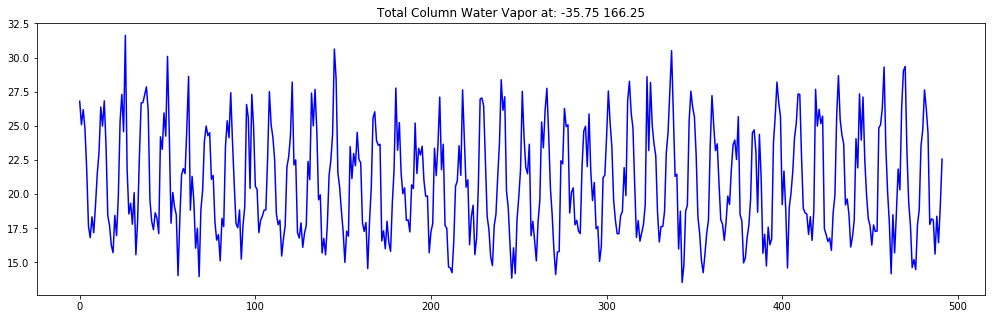

In [50]:
tcwv_values = [0] * (len(tcwv_data))
pos = randint(0, 1038239)
for i in range(len(tcwv_data)):
    tcwv_values[i] = tcwv_data[i][0].values[pos]

start_lat = 90
end_lat = -90
start_lon = 0
end_lon = 359.75
step = 0.25
lat_step = find_step(start_lat, end_lat, step)
lon_step = find_step(start_lon, end_lon, step)
    
lists = create_list(start_lat, end_lat, start_lon, end_lon, lat_step, lon_step)
grid_list = lists[0]
lat_list = lists[1]
lon_list = lists[2]

rcParams['figure.figsize'] = 17, 5
plt.plot(tcwv_values, 'b')
latstr = str(get_ll(pos, grid_list, lat_list, lon_list)[0])
lonstr = str(get_ll(pos, grid_list, lat_list, lon_list)[1] - 180)
print('At position:', latstr, lonstr)
title = 'Total Column Water Vapor at: ' + latstr + ' ' + lonstr
plt.title(title)
# plt.savefig('figure.png')
plt.show()

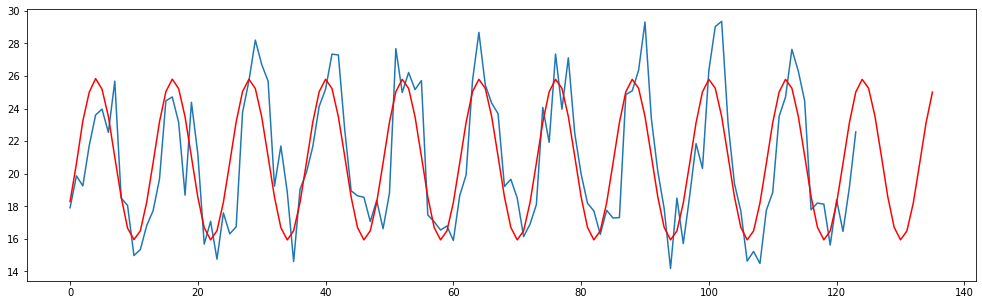

AIC: 1523.7241265253617
MSE: 6.352737432355352


In [51]:
arima_func = arima_model(tcwv_values, 12)
predictions = arima_func[0]
test = arima_func[1]
aic = arima_func[2]
mse = arima_func[3]
str_i = 'AIC: ' + str(aic) + '\nMSE: ' + str(mse)

plt.plot(test)
plt.plot(predictions, 'r')
plt.show()

print(str_i)

In [43]:
arima_func = arima_model(tcwv_values, 12)
predictions = arima_func[0]
test = arima_func[1]
aic = arima_func[2]
mse = arima_func[3]

In [ ]:
plt.plot(test)
plt.plot(predictions, 'r')
plt.show()
print(' AIC:', aic, '\n', 'MSE:', mse)

In [48]:
import itertools
import warnings

train = test[0:394]

p=range(3,5)
q=range(0,5)
d=range(0,3)
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(3, 0, 0) 461.94074332560774
(3, 0, 1) 425.3612484984418
(3, 0, 3) 407.3085707231742
(3, 0, 4) 404.93476665621375
(3, 1, 0) 512.1184756810882
(3, 1, 3) 412.10463926197303
(3, 2, 0) 539.436450079703
(4, 0, 0) 446.5781675701638
(4, 0, 1) 425.0810478984963
(4, 0, 2) 405.06758008528993
(4, 0, 3) 404.922573327344
(4, 0, 4) 408.1359174245339
(4, 1, 0) 506.8496290924059
(4, 1, 3) 412.79761083176743
(4, 1, 4) 413.19209398861994
(4, 2, 0) 541.3762173386392


In [96]:
def find_lat(lat_list, any_lat, step):
    lat = min(lat_list, key=lambda x: abs(x - any_lat))
    if any_lat - lat < 0:
        lat_t = lat
        lat_b = lat - step
    else:
        lat_t = lat + step
        lat_b = lat
    return lat_b, lat_t

def find_lon(lon_list, any_lon, step):
    any_lon = any_lon + 180
    lon = min(lon_list, key=lambda x: abs(x - any_lon))
    if any_lon - lon < 0:
        lon_r = lon
        lon_l = lon - step
    else:
        lon_r = lon + step
        lon_l = lon
    return lon_l - 180, lon_r - 180

clo_lat = find_lat(lat_list, 17.36, step)
clo_lon = find_lon(lon_list, 17.17, step)
print('Bottom Latitude', clo_lat[0], 'Top Latitude', clo_lat[1])
print('Left Longitude', clo_lon[0], 'Right Longitude', clo_lon[1])

Bottom Latitude 17.25 Top Latitude 17.5
Left Longitude 17.0 Right Longitude 17.25
